# Análisis y visualización de datos abiertos con python
# Graficación y visualización de datos

Para la parte teórica de este tutorial vean la presentación de [Teoría de la
Visualización de datos](https://docs.google.com/presentation/d/18irBZ2lz2gkI-0qw_rukGj0sLBvFVj9P7z9Cq5PjAKI/edit?usp=sharing)


Matplotlib y Seaborn son bibliotecas de visualización de datos muy populares en Python. Matplotlib se utiliza para crear visualizaciones básicas y personalizadas, mientras que Seaborn se enfoca en visualizaciones estadísticas más avanzadas. Ambas bibliotecas son altamente configurables y permiten la creación de gráficos impresionantes con poco esfuerzo. También es posible crear visualizaciones interactivas utilizando bibliotecas adicionales como Bokeh y Plotly.

En primer lugar es necesario cargar los datos. Usaremos el archivo en formato pickle que ya incluye las configuraciones de tipos de datos y categorías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = "data_clean/MFC_ActualizacionNov2022_clean.pkl"
with open(in_file, 'rb') as f:
     df = load(f)
df.tail()


,Panteón_origen,Estatus_FC,Fecha_inhumación,Fecha_inhumación_diasemana,Fecha_inhumación_semanaaño,Fecha_defunción,Fecha_defunción_diasemana,Fecha_defunción_semanaaño,Restos_tipo,Sexo,Edad,Edad_años,Conocido_Desconocido,Primer_apellido,Segundo_Apellido,Nombres,Nombre_completo,Institución_origen,Tipo_institución_origen
ID,,,,,,,,,,,,,,,,,,,
XX-P996,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,NaT,NaN,NaN,Cadáver,Masculino,42,42.0,Conocido,Flores,Rosette,Sergio,Sergio Flores Rosette,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P997,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2017-10-27,Viernes,43.0,Cadáver,Masculino,64,64.0,Conocido,Juarez,Chavez,Juan Carlos,Juan Carlos Juarez Chavez,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P998,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2018-08-18,Sábado,33.0,Cadáver,Masculino,NaN,NaN,Desconocido,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial
XX-P999,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2018-05-22,Martes,21.0,Cadáver,Femenino,1,1.0,Desconocido,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial
XX-P1000,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2018-05-29,Martes,22.0,Cadáver,Masculino,NaN,NaN,Desconocido,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial


Revisemos los tipos de datos

In [2]:
df.dtypes

Panteón_origen                      category
Estatus_FC                          category
Fecha_inhumación              datetime64[ns]
Fecha_inhumación_diasemana          category
Fecha_inhumación_semanaaño             int64
Fecha_defunción               datetime64[ns]
Fecha_defunción_diasemana           category
Fecha_defunción_semanaaño            float64
Restos_tipo                         category
Sexo                                category
Edad                                  object
Edad_años                            float64
Conocido_Desconocido                category
Primer_apellido                       object
Segundo_Apellido                      object
Nombres                               object
Nombre_completo                       object
Institución_origen                    object
Tipo_institución_origen             category
dtype: object

Veamos una columna de ejemplo

In [3]:
df['Fecha_inhumación_diasemana']

ID
XX-P001     Miercoles
XX-P002        Sábado
XX-P003        Sábado
XX-P004        Sábado
XX-P005        Sábado
              ...    
XX-P996        Sábado
XX-P997        Sábado
XX-P998        Sábado
XX-P999        Sábado
XX-P1000       Sábado
Name: Fecha_inhumación_diasemana, Length: 1000, dtype: category
Categories (7, object): ['Lunes' < 'Martes' < 'Miercoles' < 'Jueves' < 'Viernes' < 'Sábado' < 'Domingo']

## 5.1 Pandas plot

El comando `.plot()` de Pandas es una función que permite crear visualizaciones de datos a partir de un DataFrame o Series de Pandas. El método `.plot()` utiliza Matplotlib como motor de visualización y ofrece una interfaz simplificada para crear gráficos a partir de datos.

Algunos de los tipos de gráficos que se pueden crear con plot() incluyen:
* Gráficos de línea `(kind='line')`: traza puntos de datos conectados por una línea.
* Gráficos de dispersión `(kind='scatter')`: traza puntos de datos en un espacio bidimensional para mostrar la relación entre dos variables.
* Gráficos de barras `(kind='bar')`: traza barras horizontales o verticales para mostrar la cantidad de valores en cada categoría. Es posible configurar que sean horizontales `(kind='barh')` y/o apiladas `(stacked=True)`.
* Gráficos de áreas `(kind='area')`: traza una línea que muestra la evolución de una variable y el área debajo de la línea se rellena con un color sólido.
* Gráficos de histogramas `(kind='hist')`: traza un histograma que muestra la distribución de los valores en un conjunto de datos continuos. Los valores se agrupan en "bins" y se cuenta la cantidad de valores que caen en cada bin.
* Gráficos de densidad de kernel `(kind='kde')`: traza una estimación de la función de densidad de probabilidad subyacente de un conjunto de datos. Este tipo de gráfico es útil para mostrar la forma general de la distribución de los datos, especialmente cuando se desea comparar varias distribuciones.

Otros tipos de gráficos incluyen gráficos de caja y bigote `(kind='box')`, de pay `(kind='pie')` o hexbin `(kind='hexbin')`

La función `plot()` también permite personalizar los gráficos mediante el uso de argumentos adicionales como `xlabel`, `ylabel`, `title`, `color`, `grid`, entre otros. Además, es posible crear gráficos múltiples en una misma figura mediante la utilización de subplots.

Les recomiendo ver la [documentación de la función](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

## 5.2 Lineas

Un gráfico de líneas de Pandas es un tipo de gráfico que se puede crear con la función `plot()` de Pandas y que traza una serie de puntos de datos conectados por una línea. Este tipo de gráfico es útil para mostrar la evolución de una variable a lo largo del tiempo o de otra variable independiente.

Para crear un gráfico de líneas en Pandas, se puede utilizar el método `plot()` y especificar el parámetro `kind='line'`, aunque esto no siempre es necesario por que es la opción por default. La función requiere como mínimo un objeto Series o DataFrame de Pandas, que contiene los datos que se van a visualizar. Además, es posible especificar algunos parámetros adicionales para personalizar el gráfico, como los títulos de los ejes, el título del gráfico, la leyenda, entre otros.

La función plot() de Pandas utiliza el índice de un objeto Series o DataFrame como el eje x y los valores numéricos como el eje y de forma predeterminada.

Si se desea trazar fechas en el eje x, Pandas puede interpretar automáticamente las fechas como valores numéricos si se utilizan objetos de fecha/hora en el índice. En ese caso, se puede utilizar la misma función plot() pero especificando el objeto de fecha/hora como el índice del objeto Series o DataFrame.

<AxesSubplot: xlabel='ID'>

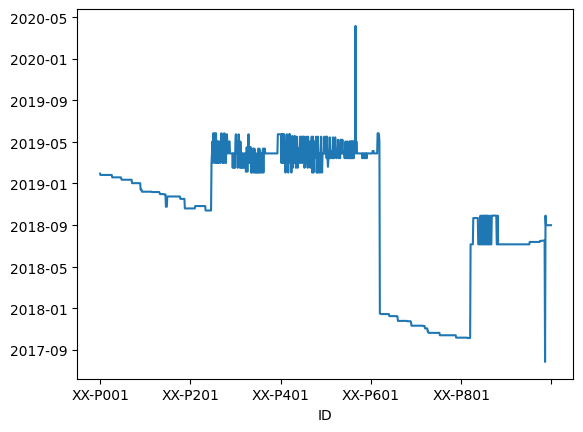

In [5]:
df['Fecha_inhumación'].plot()

Si ordenamos los datos por la fecha de inhumación, en lugar del indice, la gráfica cambia, ya que el orden de uno de los ejes se ha modificado. Sin embargo, la relación entre cada par de puntos indice/valor se mantiene.

<AxesSubplot: xlabel='ID'>

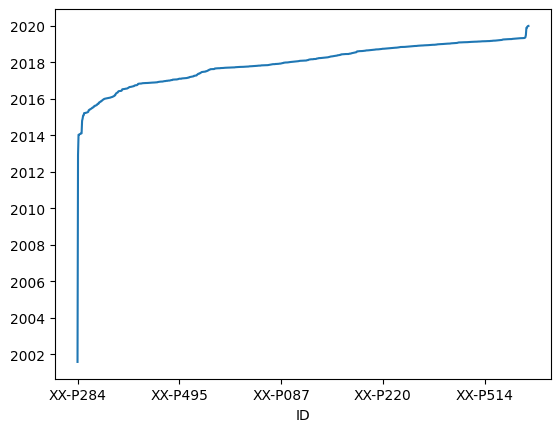

In [6]:
df['Fecha_defunción'].sort_values()  .plot()

Si se proporcionan dos columnas de un objeto DataFrame a la función plot() de Pandas, se creará un gráfico con dos series, una para cada columna, y se trazarán en el mismo gráfico con colores distintos. Ambas columnas deben contener valores numéricos y comparables para que el gráfico tenga sentido.

<AxesSubplot: xlabel='ID'>

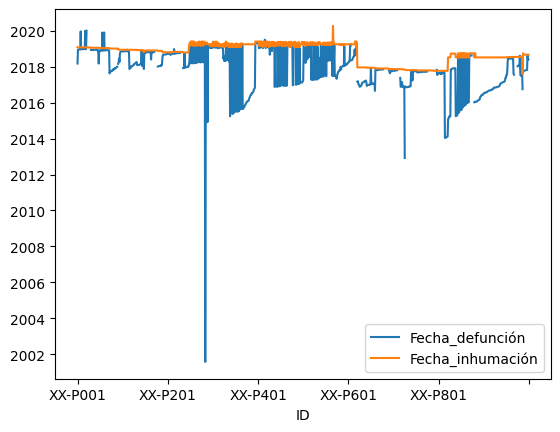

In [7]:
df[['Fecha_defunción','Fecha_inhumación']] .plot()

## 5.3 Scatterplot

Un gráfico de dispersión (también conocido como scatter plot en inglés) es un tipo de gráfico que representa datos como una serie de puntos individuales en un sistema de coordenadas cartesianas. Cada punto en el gráfico representa una observación y está ubicado en las coordenadas correspondientes a sus valores en dos variables diferentes.
Los gráficos de dispersión son útiles para explorar patrones, identificar valores atípicos y observar cómo se relacionan dos variables entre sí. 

Por ejemplo, para una gráfica de puntos scatter las opciones son:
* `DataFrame.plot(kind='scatter')`
* `DataFrame.plot.scatter()`

Para este gráfico es necesario especificar las columnas que se usarán en el eje `x` y `y`

<AxesSubplot: xlabel='Fecha_defunción', ylabel='Fecha_inhumación'>

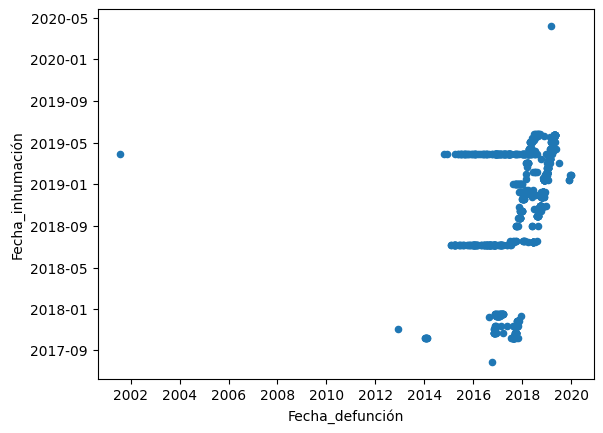

In [18]:
df.plot.scatter(x='Fecha_defunción', y='Fecha_inhumación', )

## 5.4 Barras

Pandas puede utilizarse para crear gráficos de barras, los cuales son un tipo de gráfico utilizado para representar datos categóricos. Un gráfico de barras consiste en barras horizontales o verticales que representan las diferentes categorías en el eje x y la frecuencia o valor de cada categoría en el eje y.

En este caso, se calcula primero la cantidad de registros para cada tipos de restos.

In [8]:
df['Restos_tipo'].value_counts()

Cadáver            646
Restos cremados    217
Miembros            76
Feto                40
Restos humanos      20
Restos óseos         1
Name: Restos_tipo, dtype: int64

Al ser estos datos de frecuencia de diferentes categorías usaremos el gráfico de barras.

<AxesSubplot: >

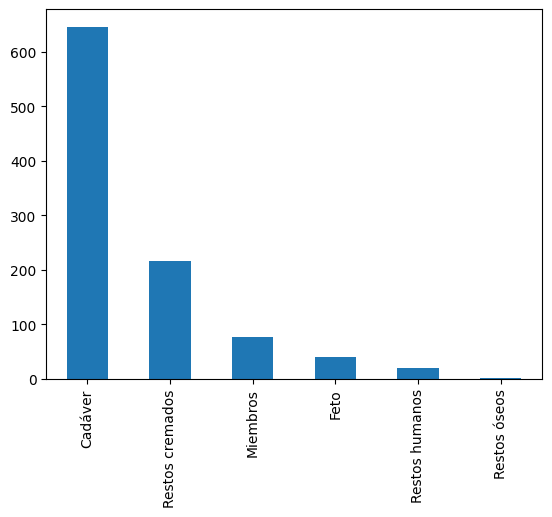

In [9]:
df['Restos_tipo'].value_counts().plot(kind='bar')

La opción `(kind='barh')` permite hacer gráficos con barras horizontales.

<AxesSubplot: >

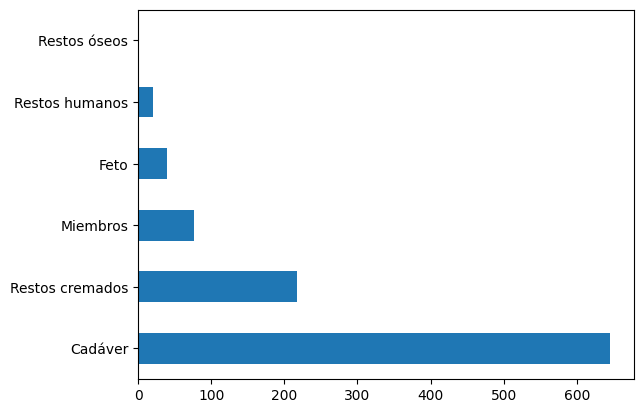

In [10]:
df['Restos_tipo'].value_counts().plot(kind='barh')

Se pueden hacer gráficos más complicados dependiendo de los tipos de datos existentes. Por ejemplo, comparemos la distribución de sexo de acuerdo al tipo de restos. Para hacer esto necesitamos calcular cuantos registros hay para cada combinación de conocido/desconocido y de sexo. Haremos eso calculando la tabla pivote y la función `count`. 

Una tabla pivote resume una tabla de datos larga y detallada en una tabla resumida más corta que muestra información resumida y agregada sobre los datos. En una tabla pivote, los datos se organizan en filas y columnas y se agregan a través de una función de agregación, como suma, promedio, máximo o mínimo. 

In [11]:
df_tipo_sexo = pd.pivot_table(df, index='Restos_tipo', columns='Sexo', 
                              values='Panteón_origen', aggfunc='count')
df_tipo_sexo = df_tipo_sexo[['Masculino','Femenino','Indeterminado']]
df_tipo_sexo

Sexo,Masculino,Femenino,Indeterminado
Restos_tipo,,,
Cadáver,565,80,1
Restos humanos,12,6,2
Restos cremados,157,60,0
Restos óseos,0,0,1
Feto,26,8,6
Miembros,58,15,3


<AxesSubplot: xlabel='Restos_tipo'>

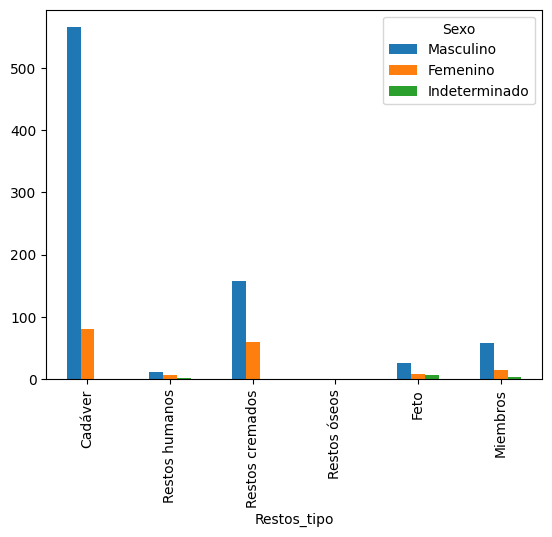

In [13]:
df_tipo_sexo.plot(kind='bar')

Podemos apilar las barras que tienen un mismo indice o tipo de restos para comparar los datos más facilmente.

<AxesSubplot: xlabel='Restos_tipo'>

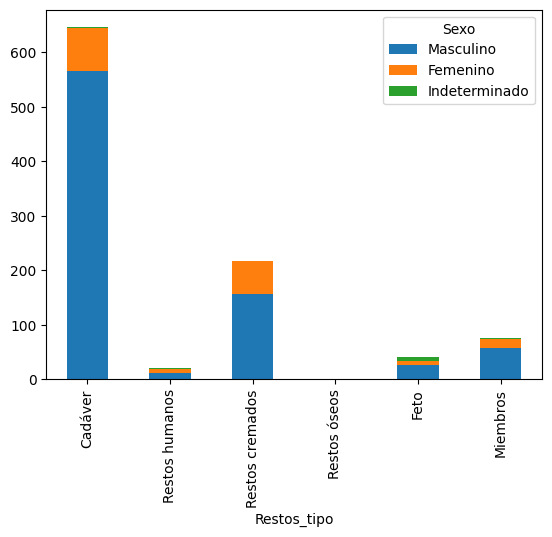

In [15]:
df_tipo_sexo.plot(kind='bar', stacked=True)

## 5.5 Histogramas

Un gráfico de histograma es un tipo de gráfico utilizado para representar la distribución de frecuencia de un conjunto de datos continuos. En este tipo de gráfico, se divide el rango de los datos en un número determinado de intervalos o "bins", y se cuenta cuántos datos caen dentro de cada intervalo.

El eje horizontal del gráfico representa el rango de valores de los datos, y se divide en los intervalos o bins mencionados anteriormente. El eje vertical muestra la frecuencia o la cantidad de observaciones que se encuentran en cada intervalo.

Por ejemplo, podemos usar esto para ver la distribución de edades.

<AxesSubplot: ylabel='Frequency'>

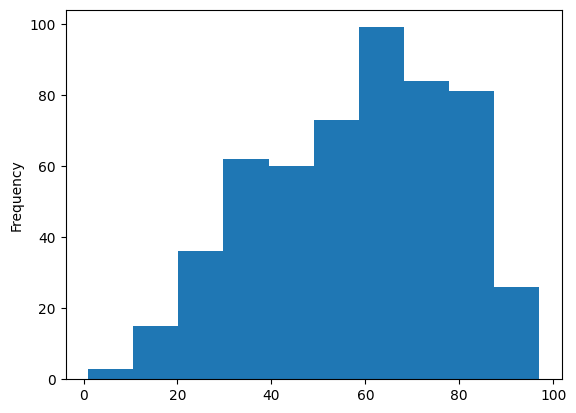

In [19]:
df['Edad_años'].plot.hist()

Pandas determina automáticamente cuales son los bins, pero es posible crear bins de distintos tamaños si nos interesa fijarnos en intervalos partículares.

<AxesSubplot: ylabel='Frequency'>

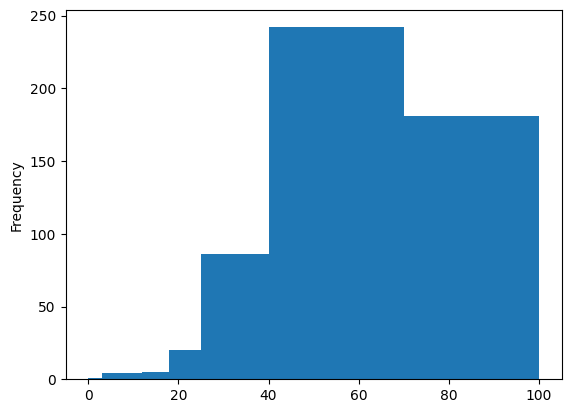

In [26]:
df['Edad_años'].plot.hist(bins=[0,3,12,18,25,40,70,100])

## 5.6 KDE

KDE es la abreviación de Kernel Density Estimation, que en español se traduce como estimación de la densidad de núcleo o estimación de la densidad de kernel. Es una técnica utilizada para estimar la distribución de probabilidad subyacente de un conjunto de datos continuos.

En lugar de representar los datos con un histograma, que consiste en contar la cantidad de observaciones en cada intervalo, el KDE utiliza una función de densidad de probabilidad suave para modelar la distribución de los datos. Esta función es una suma ponderada de funciones de núcleo, donde cada función de núcleo es una función de probabilidad que se centra en un punto de datos individual.

El resultado es una curva suave que representa la distribución de probabilidad subyacente del conjunto de datos. El KDE es útil para visualizar la forma de la distribución de datos y puede ayudar a identificar patrones en los datos que pueden ser difíciles de ver con otros métodos de visualización.

Estos gráficos pueden ser más utiles para ver la distribución de un conjunto de datos. Por ejemplo, veamos la distribución de la Edad.

<AxesSubplot: ylabel='Density'>

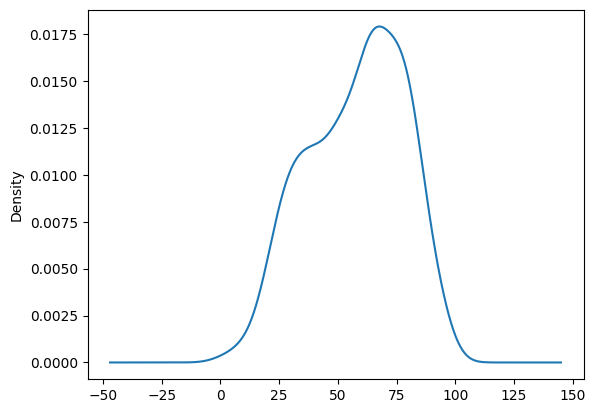

In [27]:
df['Edad_años'].plot(kind='kde')

La distribución de un conjunto de datos es la forma en que los datos se agrupan y se distribuyen a lo largo de un rango de valores. La distribución puede ser simétrica o asimétrica, y puede tener una o varias modas o picos.

Algunas distribuciones comunes incluyen la distribución normal, la distribución uniforme, la distribución de Poisson y la distribución exponencial. Cada una de estas distribuciones tiene una forma característica y se utiliza para modelar diferentes tipos de datos.

Es importante comprender la distribución de los datos porque puede afectar cómo se analizan y se interpretan. Por ejemplo, si los datos se distribuyen normalmente, se pueden utilizar pruebas estadísticas específicas para analizarlos, mientras que si los datos tienen una distribución asimétrica, puede ser necesario utilizar diferentes técnicas de análisis.

En resumen, la distribución de un conjunto de datos se refiere a la forma en que los datos se agrupan y se distribuyen a lo largo de un rango de valores, y es importante comprenderla para poder analizar y interpretar los datos de manera efectiva.

## 5.7 Multigráficos

Seleccionar variables

* Conocidos y desconocidos: eje x
* Incidencias (numericas): eje y
* Por sexo: color y multiple
* Por tipo de restos: color y multiple 

In [28]:
dic_col ={'Femenino':'#bebada', 'Indeterminado':'#d9d9d9', 'Masculino':'#80b1d3', 
          'Restos cremados':'#b3de69','Cadáver':'#fb8072','Feto':'#fdb462',
          'Miembros':'#fccde5','Restos humanos':'#8dd3c7','Restos óseos':'#ffffb3',}
dic_col


{'Femenino': '#bebada',
 'Indeterminado': '#d9d9d9',
 'Masculino': '#80b1d3',
 'Restos cremados': '#b3de69',
 'Cadáver': '#fb8072',
 'Feto': '#fdb462',
 'Miembros': '#fccde5',
 'Restos humanos': '#8dd3c7',
 'Restos óseos': '#ffffb3'}

In [29]:
data_sexo = pd.pivot_table(df, values='Estatus_FC', index='Conocido_Desconocido', columns='Sexo', aggfunc='count')
data_sexo

Sexo,Femenino,Indeterminado,Masculino
Conocido_Desconocido,,,
Conocido,136,3,440
Desconocido,33,10,378


Colores

In [30]:
data_restos = pd.pivot_table(df, values='Estatus_FC', index='Conocido_Desconocido', columns='Restos_tipo', aggfunc='count')
data_restos

Restos_tipo,Cadáver,Restos humanos,Restos cremados,Restos óseos,Feto,Miembros
Conocido_Desconocido,,,,,,
Conocido,257,18,216,0,16,72
Desconocido,389,2,1,1,24,4


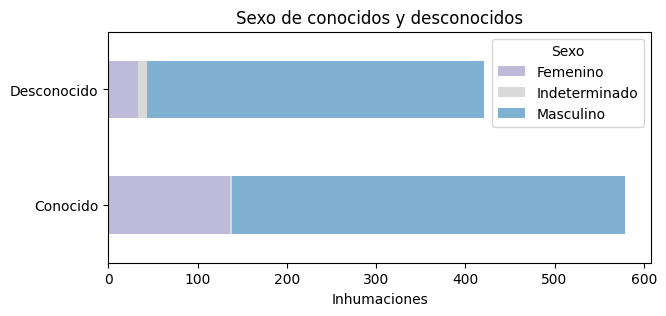

In [31]:
fig = data_sexo.plot.barh(stacked=True, 
                    color=dic_col, figsize=[7,3],
                    xlabel="Inhumaciones", ylabel="", 
                    title="Sexo de conocidos y desconocidos",
                    )
plt.show()

In [32]:
f_plt_sexo = "images/conocido_desconocido_vs_sexo.svg"
fig.savefig(f_plt_sexo)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

<AxesSubplot: title={'center': 'Tipo de restos de conocidos y desconocidos'}, xlabel='Inhumaciones'>

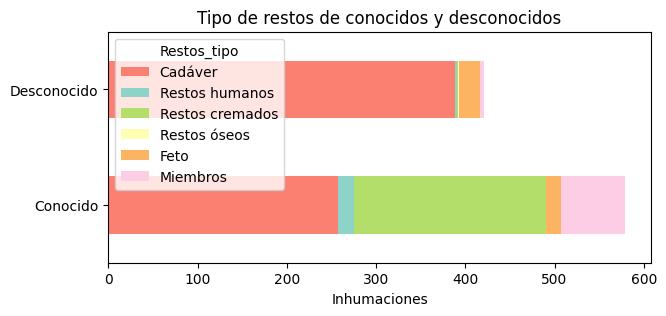

In [33]:
data_restos.plot.barh(stacked=True, 
                      color=dic_col, figsize=[7,3],
                      xlabel="Inhumaciones", ylabel="", 
                      title="Tipo de restos de conocidos y desconocidos",
                      )

In [34]:
f_plt_sexo = "images/conocido_desconocido_vs_sexo.svg"
fig.savefig(f_plt_sexo)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'